In [ ]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

In [ ]:
im = Image.open('imagez/4.png').convert('L')
image_array = np.asarray(im)

starting_centroids_0 = random.randint(0, 255)
starting_centroids_1 = random.randint(0, 255)
centroid_0_avg = 0
centroid_1_avg = 1
num_iters = 30

hist, bins = np.histogram(image_array, 256, [0, 256])

In [ ]:
for k in range(num_iters):
  if(k == 0): #Initial segmentation
    centre_0 = starting_centroids_0
    centre_1 = starting_centroids_1
  else:
    centre_0 = centroid_0_avg
    centre_1 = centroid_1_avg
  w0_centroid = list()
  w1_centroid = list()
  point_0_centroid = list()
  point_1_centroid = list()
  sum_0 = 0
  sum_1 = 0
  for index, value in enumerate(hist):
    if(abs(index - centre_0) < abs(index - centre_1)):
      point_0_centroid.append(index)
      w0_centroid.append(value)
      sum_0 = sum_0 + (index * value)
    else:
      point_1_centroid.append(index)
      w1_centroid.append(value)
      sum_1 = sum_1 + (index * value)
  centroid_0_avg = sum_0 // sum(w0_centroid)
  centroid_1_avg = sum_1 // sum(w1_centroid)

In [ ]:
result = np.zeros((np.shape(image_array)[0], np.shape(image_array)[1]))

for i in range(np.shape(image_array)[0]):
  for j in range(np.shape(image_array)[1]):
    if(image_array[i][j] in point_0_centroid):
      result[i][j] = int(0)
    else:
      result[i][j] = int(1)

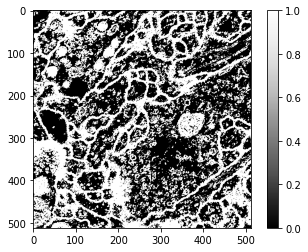

In [ ]:
plt.imshow(result, cmap="Greys_r")
plt.colorbar()
plt.show()